In [4]:
import pandas as pd

In [5]:
%cd ~/../../data/p_dsi/teams2023/asurion_data/

/gpfs52/data/p_dsi/teams2023/asurion_data


In [6]:
df = pd.read_excel('../team1/combined_phone_data.xlsx')

In [26]:
df

,Unnamed: 0,phone model,phone size,phone color,claim,weeks_monday,Year,Month,brand,model,generation,week_of_month,month,year
0,0,alcatel axel,32gb,black,1,2022-01-24,2022,1,alcatel,axel,NaN,4,1,2022
1,1,alcatel axel,32gb,black,3,2022-11-14,2022,11,alcatel,axel,NaN,2,11,2022
2,2,alcatel axel,32gb,black,1,2022-11-21,2022,11,alcatel,axel,NaN,3,11,2022
3,3,alcatel axel,32gb,black,3,2022-11-28,2022,11,alcatel,axel,NaN,4,11,2022
4,4,alcatel axel,32gb,black,1,2022-12-12,2022,12,alcatel,axel,NaN,2,12,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26656,26656,samsung galaxy z fold3,256gb,silver,17,2023-01-30,2023,1,samsung,galaxy,z,5,1,2023
26657,26657,samsung galaxy z fold3,256gb,silver,26,2023-02-06,2023,2,samsung,galaxy,z,1,2,2023
26658,26658,samsung galaxy z fold3,256gb,silver,4,2023-02-13,2023,2,samsung,galaxy,z,2,2,2023
26659,26659,samsung galaxy z fold3,512gb,black,61,2023-02-06,2023,2,samsung,galaxy,z,1,2,2023


In [12]:
df_size = df.groupby(['phone size'])['phone size'].count().sort_values(ascending=False)
print("\nSorted in Descending order...")
print(df_size)


Sorted in Descending order...
phone size
128gb    9382
64gb     6854
256gb    5514
32gb     2577
16gb     1329
512gb     922
4gb        48
8gb        35
Name: phone size, dtype: int64


# finding outliers

use the z-score method to find outlier

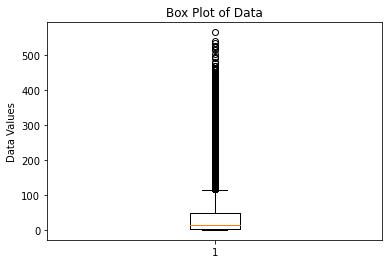

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a random dataset
data = df.loc[:,"claim"]

# Create a box plot
fig, ax = plt.subplots()
ax.boxplot(data)

# Set the title and labels
ax.set_title("Box Plot of Data")
ax.set_ylabel("Data Values")

# Show the plot
plt.show()

In [7]:
# iterating the columns
for col in df.columns:
    print(col)

Unnamed: 0
phone model
phone size
phone color
claim
weeks_monday
Year
Month
brand
model
generation
week_of_month
month
year


In [14]:
import seaborn as sns
import pandas as pd

# Create a sample dataset
data = df.loc[:,['phone model','claim','phone size']]

df_claim_model = pd.DataFrame(data)

In [9]:
df_claim_model

,phone model,claim,phone size
0,alcatel axel,1,32gb
1,alcatel axel,3,32gb
2,alcatel axel,1,32gb
3,alcatel axel,3,32gb
4,alcatel axel,1,32gb
...,...,...,...
26656,samsung galaxy z fold3,17,256gb
26657,samsung galaxy z fold3,26,256gb
26658,samsung galaxy z fold3,4,256gb
26659,samsung galaxy z fold3,61,512gb


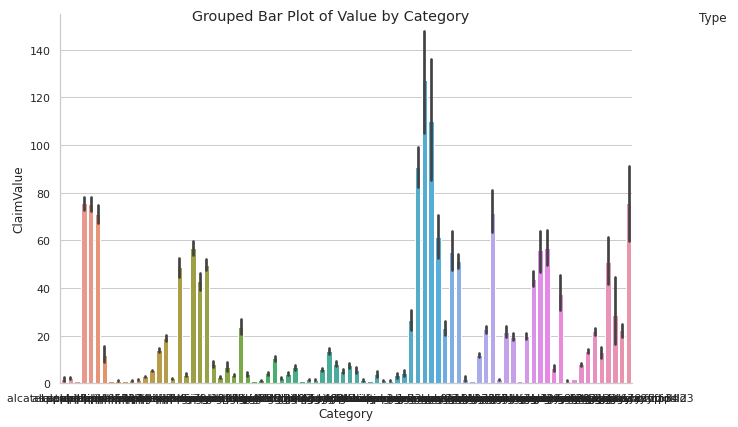

In [10]:
import seaborn as sns
import pandas as pd

# Create a sample dataset

data = df_claim_model

# Create a grouped bar plot
sns.set(style='whitegrid')
g = sns.catplot(x="phone model", y="claim", data=df, kind='bar', height=6, aspect=1.5)

# Set the title and labels
g.fig.suptitle('Grouped Bar Plot of Value by Category ')
g.set_xlabels('Category')
g.set_ylabels('ClaimValue')

# Move the legend outside the plot
g.add_legend(title='Type', bbox_to_anchor=(1.02, 1), loc='upper left')

# Show the plot
plt.show()



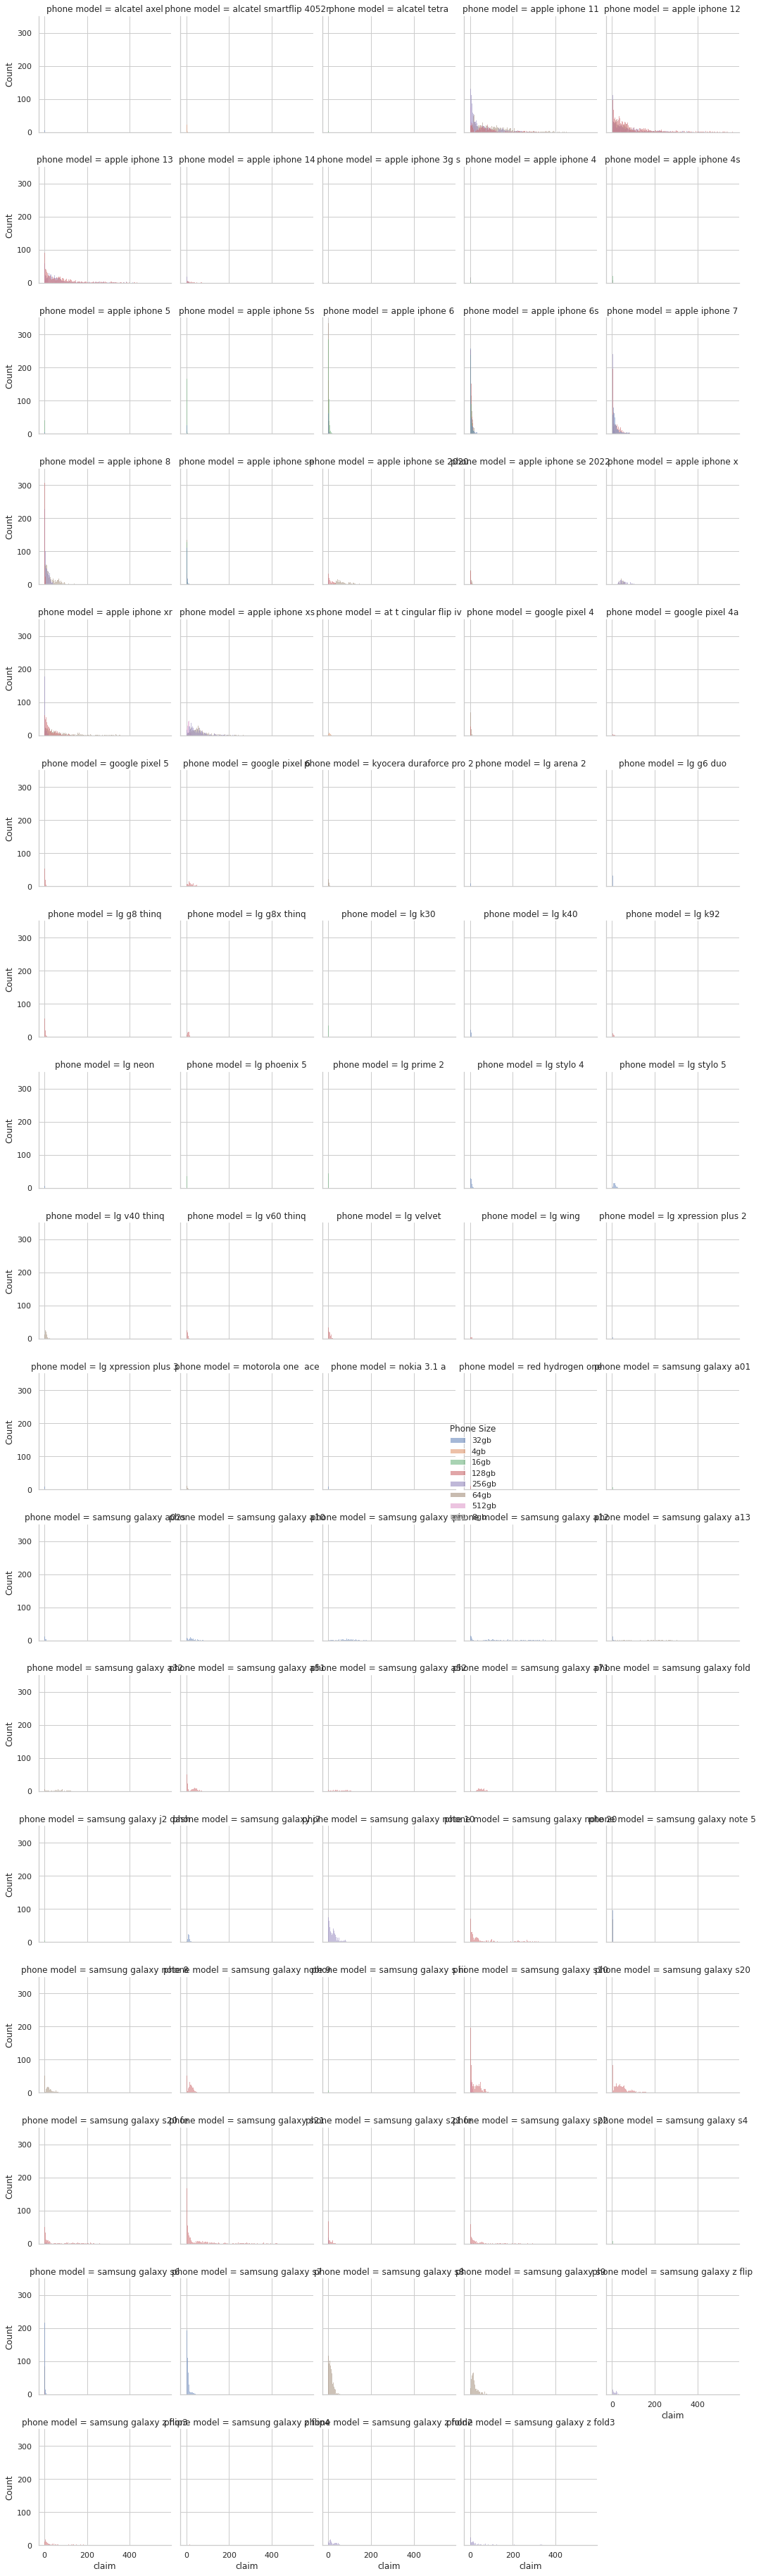

In [11]:
g = sns.displot(df_claim_model, x="claim", hue="phone size", col="phone model", col_wrap=5, height=3)
sns.move_legend(g, "upper left", bbox_to_anchor=(.55, .45), title='Phone Size')
plt.show()

That's a lot. How about just see the iphone first

In [59]:
df_iphone = df[df['phone model'].str.contains('iphone')]

In [60]:
df_iphone

,Unnamed: 0,phone model,phone size,phone color,claim,weeks_monday,Year,Month,brand,model,generation,week_of_month,month,year
32,32,apple iphone 11,128gb,black,111,2021-06-28,2021,6,apple,iphone,11,4,6,2021
33,33,apple iphone 11,128gb,black,319,2021-07-05,2021,7,apple,iphone,11,1,7,2021
34,34,apple iphone 11,128gb,black,320,2021-07-12,2021,7,apple,iphone,11,2,7,2021
35,35,apple iphone 11,128gb,black,305,2021-07-19,2021,7,apple,iphone,11,3,7,2021
36,36,apple iphone 11,128gb,black,269,2021-07-26,2021,7,apple,iphone,11,4,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17906,17906,apple iphone xs,64gb,silver,18,2023-01-16,2023,1,apple,iphone,xs,3,1,2023
17907,17907,apple iphone xs,64gb,silver,19,2023-01-23,2023,1,apple,iphone,xs,4,1,2023
17908,17908,apple iphone xs,64gb,silver,14,2023-01-30,2023,1,apple,iphone,xs,5,1,2023
17909,17909,apple iphone xs,64gb,silver,13,2023-02-06,2023,2,apple,iphone,xs,1,2,2023


In [61]:
df_iphone_size = df_iphone.groupby(['phone model'])['phone model'].count().sort_values(ascending=False)
print("\nSorted in Descending order...")
print(df_iphone_size)


Sorted in Descending order...
phone model
apple iphone 12         3219
apple iphone 11         3027
apple iphone 6s         1742
apple iphone 13         1661
apple iphone 8          1620
apple iphone 7          1482
apple iphone xr         1235
apple iphone xs         1202
apple iphone 6          1039
apple iphone se          445
apple iphone se 2020     387
apple iphone x           309
apple iphone 5s          210
apple iphone se 2022     131
apple iphone 14           68
apple iphone 5            47
apple iphone 4s           31
apple iphone 4            20
apple iphone 3g s          4
Name: phone model, dtype: int64


In [62]:
df_iphone_11 = df_iphone[df_iphone['phone model'].str.contains('11')]

In [63]:
df_iphone_11

,Unnamed: 0,phone model,phone size,phone color,claim,weeks_monday,Year,Month,brand,model,generation,week_of_month,month,year
32,32,apple iphone 11,128gb,black,111,2021-06-28,2021,6,apple,iphone,11,4,6,2021
33,33,apple iphone 11,128gb,black,319,2021-07-05,2021,7,apple,iphone,11,1,7,2021
34,34,apple iphone 11,128gb,black,320,2021-07-12,2021,7,apple,iphone,11,2,7,2021
35,35,apple iphone 11,128gb,black,305,2021-07-19,2021,7,apple,iphone,11,3,7,2021
36,36,apple iphone 11,128gb,black,269,2021-07-26,2021,7,apple,iphone,11,4,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054,3054,apple iphone 11,64gb,silver,18,2023-01-16,2023,1,apple,iphone,11,3,1,2023
3055,3055,apple iphone 11,64gb,silver,13,2023-01-23,2023,1,apple,iphone,11,4,1,2023
3056,3056,apple iphone 11,64gb,silver,5,2023-01-30,2023,1,apple,iphone,11,5,1,2023
3057,3057,apple iphone 11,64gb,silver,15,2023-02-06,2023,2,apple,iphone,11,1,2,2023


In [17]:
df_iphone_11_size = df_iphone_11.groupby(['phone model'])['phone size'].count().sort_values(ascending=False)
print("\nSorted in Descending order...")
print(df_iphone_11_size)


Sorted in Descending order...
phone model
apple iphone 11    3027
Name: phone size, dtype: int64


In [18]:
import matplotlib.pyplot as plt

In [12]:
df_iphone_11

,Unnamed: 0,phone model,phone size,phone color,claim,weeks_monday,Year,Month,brand,model,generation,week_of_month,month,year
32,32,apple iphone 11,128gb,black,111,2021-06-28,2021,6,apple,iphone,11,4,6,2021
33,33,apple iphone 11,128gb,black,319,2021-07-05,2021,7,apple,iphone,11,1,7,2021
34,34,apple iphone 11,128gb,black,320,2021-07-12,2021,7,apple,iphone,11,2,7,2021
35,35,apple iphone 11,128gb,black,305,2021-07-19,2021,7,apple,iphone,11,3,7,2021
36,36,apple iphone 11,128gb,black,269,2021-07-26,2021,7,apple,iphone,11,4,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054,3054,apple iphone 11,64gb,silver,18,2023-01-16,2023,1,apple,iphone,11,3,1,2023
3055,3055,apple iphone 11,64gb,silver,13,2023-01-23,2023,1,apple,iphone,11,4,1,2023
3056,3056,apple iphone 11,64gb,silver,5,2023-01-30,2023,1,apple,iphone,11,5,1,2023
3057,3057,apple iphone 11,64gb,silver,15,2023-02-06,2023,2,apple,iphone,11,1,2,2023


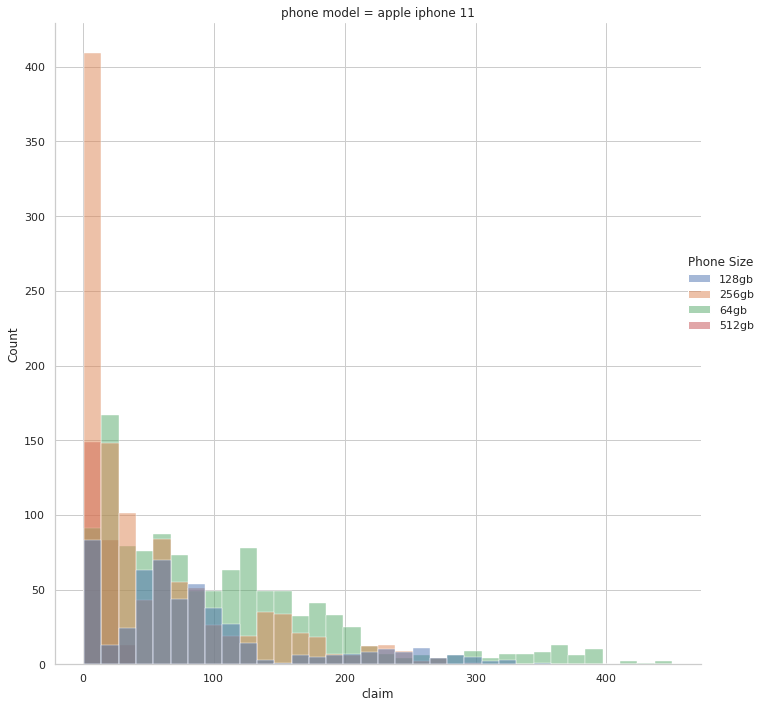

In [20]:
g_iphone_11 = sns.displot(df_iphone_11, x="claim", hue="phone size", col="phone model", col_wrap=1, height=3)
sns.move_legend(g_iphone_11, "upper left", bbox_to_anchor=(.95, .65), title='Phone Size')
g_iphone_11.fig.set_size_inches(10,10)

# Try redrawing the plot and using tight layout
plt.draw()
plt.tight_layout()

plt.show()

In [21]:
# Near zero ones should be consider to be outliers such as the 256gb for iphone 11 & the 512gb for iphone 11 pro

<AxesSubplot:xlabel='claim'>

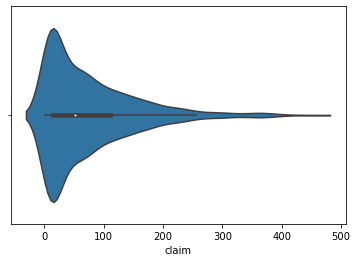

In [54]:
sns.violinplot(x=df_iphone_11["claim"])


The above violin plot is the overall pattern for iphone 11. Most of them are around 0-50
Then, group by a categorical variable(phone size), referencing columns in a dataframe

In [55]:
x=df_iphone_11["claim"]
x

32      111
33      319
34      320
35      305
36      269
       ... 
3054     18
3055     13
3056      5
3057     15
3058      1
Name: claim, Length: 3027, dtype: int64

In [56]:
df.query("`claim` >= 200 or `claim` <= 10")

,Unnamed: 0,phone model,phone size,phone color,claim,weeks_monday,Year,Month,brand,model,generation,week_of_month,month,year
0,0,alcatel axel,32gb,black,1,2022-01-24,2022,1,alcatel,axel,NaN,4,1,2022
1,1,alcatel axel,32gb,black,3,2022-11-14,2022,11,alcatel,axel,NaN,2,11,2022
2,2,alcatel axel,32gb,black,1,2022-11-21,2022,11,alcatel,axel,NaN,3,11,2022
3,3,alcatel axel,32gb,black,3,2022-11-28,2022,11,alcatel,axel,NaN,4,11,2022
4,4,alcatel axel,32gb,black,1,2022-12-12,2022,12,alcatel,axel,NaN,2,12,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26639,26639,samsung galaxy z fold3,256gb,silver,5,2022-09-26,2022,9,samsung,galaxy,z,4,9,2022
26641,26641,samsung galaxy z fold3,256gb,silver,4,2022-10-17,2022,10,samsung,galaxy,z,3,10,2022
26649,26649,samsung galaxy z fold3,256gb,silver,1,2022-12-12,2022,12,samsung,galaxy,z,2,12,2022
26650,26650,samsung galaxy z fold3,256gb,silver,10,2022-12-19,2022,12,samsung,galaxy,z,3,12,2022


In [57]:
df.query("`claim` <= 10")

,Unnamed: 0,phone model,phone size,phone color,claim,weeks_monday,Year,Month,brand,model,generation,week_of_month,month,year
0,0,alcatel axel,32gb,black,1,2022-01-24,2022,1,alcatel,axel,NaN,4,1,2022
1,1,alcatel axel,32gb,black,3,2022-11-14,2022,11,alcatel,axel,NaN,2,11,2022
2,2,alcatel axel,32gb,black,1,2022-11-21,2022,11,alcatel,axel,NaN,3,11,2022
3,3,alcatel axel,32gb,black,3,2022-11-28,2022,11,alcatel,axel,NaN,4,11,2022
4,4,alcatel axel,32gb,black,1,2022-12-12,2022,12,alcatel,axel,NaN,2,12,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26639,26639,samsung galaxy z fold3,256gb,silver,5,2022-09-26,2022,9,samsung,galaxy,z,4,9,2022
26641,26641,samsung galaxy z fold3,256gb,silver,4,2022-10-17,2022,10,samsung,galaxy,z,3,10,2022
26649,26649,samsung galaxy z fold3,256gb,silver,1,2022-12-12,2022,12,samsung,galaxy,z,2,12,2022
26650,26650,samsung galaxy z fold3,256gb,silver,10,2022-12-19,2022,12,samsung,galaxy,z,3,12,2022


That's really in sine... 1/3 of the datapoints have claim less than 10.

In [64]:
df_iphone.query("`claim` <= 10")

,Unnamed: 0,phone model,phone size,phone color,claim,weeks_monday,Year,Month,brand,model,generation,week_of_month,month,year
203,203,apple iphone 11,128gb,green,5,2023-02-13,2023,2,apple,iphone,11,2,2,2023
462,462,apple iphone 11,128gb,yellow,3,2021-06-28,2021,6,apple,iphone,11,4,6,2021
464,464,apple iphone 11,128gb,yellow,5,2021-07-12,2021,7,apple,iphone,11,2,7,2021
465,465,apple iphone 11,128gb,yellow,8,2021-07-19,2021,7,apple,iphone,11,3,7,2021
468,468,apple iphone 11,128gb,yellow,8,2021-08-09,2021,8,apple,iphone,11,2,8,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17679,17679,apple iphone xs,64gb,gold,1,2021-11-22,2021,11,apple,iphone,xs,4,11,2021
17680,17680,apple iphone xs,64gb,gold,1,2021-12-06,2021,12,apple,iphone,xs,1,12,2021
17824,17824,apple iphone xs,64gb,gray,8,2023-02-13,2023,2,apple,iphone,xs,2,2,2023
17876,17876,apple iphone xs,64gb,silver,10,2022-06-20,2022,6,apple,iphone,xs,3,6,2022


In [65]:
df_iphone_11.query("`claim` <= 10")

,Unnamed: 0,phone model,phone size,phone color,claim,weeks_monday,Year,Month,brand,model,generation,week_of_month,month,year
203,203,apple iphone 11,128gb,green,5,2023-02-13,2023,2,apple,iphone,11,2,2,2023
462,462,apple iphone 11,128gb,yellow,3,2021-06-28,2021,6,apple,iphone,11,4,6,2021
464,464,apple iphone 11,128gb,yellow,5,2021-07-12,2021,7,apple,iphone,11,2,7,2021
465,465,apple iphone 11,128gb,yellow,8,2021-07-19,2021,7,apple,iphone,11,3,7,2021
468,468,apple iphone 11,128gb,yellow,8,2021-08-09,2021,8,apple,iphone,11,2,8,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,3043,apple iphone 11,64gb,silver,10,2022-10-31,2022,10,apple,iphone,11,5,10,2022
3050,3050,apple iphone 11,64gb,silver,8,2022-12-19,2022,12,apple,iphone,11,3,12,2022
3053,3053,apple iphone 11,64gb,silver,7,2023-01-09,2023,1,apple,iphone,11,2,1,2023
3056,3056,apple iphone 11,64gb,silver,5,2023-01-30,2023,1,apple,iphone,11,5,1,2023


In [68]:
# Select the phone size 128gb as a sample to test
df_iphone_11_test_128gb  = df_iphone_11[df_iphone_11['phone size'].str.contains('128')]
df_iphone_11_test_128gb

,Unnamed: 0,phone model,phone size,phone color,claim,weeks_monday,Year,Month,brand,model,generation,week_of_month,month,year
32,32,apple iphone 11,128gb,black,111,2021-06-28,2021,6,apple,iphone,11,4,6,2021
33,33,apple iphone 11,128gb,black,319,2021-07-05,2021,7,apple,iphone,11,1,7,2021
34,34,apple iphone 11,128gb,black,320,2021-07-12,2021,7,apple,iphone,11,2,7,2021
35,35,apple iphone 11,128gb,black,305,2021-07-19,2021,7,apple,iphone,11,3,7,2021
36,36,apple iphone 11,128gb,black,269,2021-07-26,2021,7,apple,iphone,11,4,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,543,apple iphone 11,128gb,yellow,7,2023-01-16,2023,1,apple,iphone,11,3,1,2023
544,544,apple iphone 11,128gb,yellow,2,2023-01-23,2023,1,apple,iphone,11,4,1,2023
545,545,apple iphone 11,128gb,yellow,4,2023-01-30,2023,1,apple,iphone,11,5,1,2023
546,546,apple iphone 11,128gb,yellow,4,2023-02-06,2023,2,apple,iphone,11,1,2,2023


In [80]:
df_iphone_11_claim_count = df.groupby(['weeks_monday','phone size'])['claim'].count()
# 'phone color'

In [81]:
df_iphone_11_claim_count

weeks_monday  phone size
2021-06-28    128gb         65
              16gb          14
              256gb         45
              32gb          27
              512gb         13
                            ..
2023-02-13    16gb           4
              256gb         54
              32gb           9
              512gb          8
              64gb          62
Name: claim, Length: 585, dtype: int64

In [82]:
df_iphone_11_test_128gb



,Unnamed: 0,phone model,phone size,phone color,claim,weeks_monday,Year,Month,brand,model,generation,week_of_month,month,year
32,32,apple iphone 11,128gb,black,111,2021-06-28,2021,6,apple,iphone,11,4,6,2021
33,33,apple iphone 11,128gb,black,319,2021-07-05,2021,7,apple,iphone,11,1,7,2021
34,34,apple iphone 11,128gb,black,320,2021-07-12,2021,7,apple,iphone,11,2,7,2021
35,35,apple iphone 11,128gb,black,305,2021-07-19,2021,7,apple,iphone,11,3,7,2021
36,36,apple iphone 11,128gb,black,269,2021-07-26,2021,7,apple,iphone,11,4,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,543,apple iphone 11,128gb,yellow,7,2023-01-16,2023,1,apple,iphone,11,3,1,2023
544,544,apple iphone 11,128gb,yellow,2,2023-01-23,2023,1,apple,iphone,11,4,1,2023
545,545,apple iphone 11,128gb,yellow,4,2023-01-30,2023,1,apple,iphone,11,5,1,2023
546,546,apple iphone 11,128gb,yellow,4,2023-02-06,2023,2,apple,iphone,11,1,2,2023


In [84]:
# Group by date and sum up the claim and store that as a new column called total_claim
df_iphone_11_test_128gb_claim_count = df.groupby(['weeks_monday'])['claim'].size().reset_index(name='total_claim')
df_iphone_11_test_128gb_claim_count
# 'phone color'

,weeks_monday,total_claim
0,2021-06-28,238
1,2021-07-05,246
2,2021-07-12,238
3,2021-07-19,236
4,2021-07-26,235
...,...,...
81,2023-01-16,367
82,2023-01-23,346
83,2023-01-30,359
84,2023-02-06,333


In [85]:
df_iphone_11_test_128gb_claim_count.dtypes

weeks_monday    datetime64[ns]
total_claim              int64
dtype: object

Looks great! The data column is already in the date column to a datestamp type

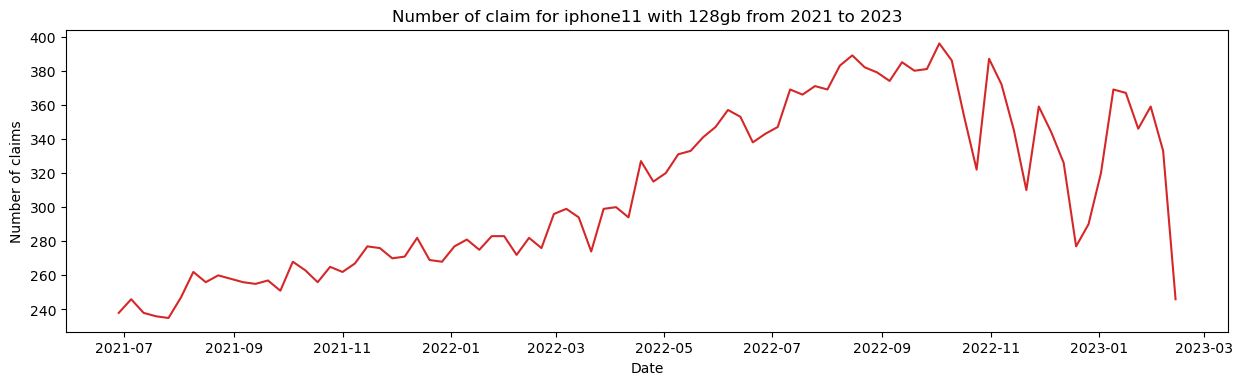

In [88]:
def plot_df(df_iphone_11_test_128gb_claim_count, x, y, title="", xlabel='Date', ylabel='Number of claims', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(df, x=df_iphone_11_test_128gb_claim_count['weeks_monday'], y=df_iphone_11_test_128gb_claim_count['total_claim'], title='Number of claim for iphone11 with 128gb from 2021 to 2023')





In [89]:
df_iphone_11_claim_count_color = df.groupby(['weeks_monday','phone size','phone color'])['claim'].count()

In [90]:
df_iphone_11_claim_count_color

weeks_monday  phone size  phone color
2021-06-28    128gb       black          13
                          blue            9
                          bronze          1
                          coral           1
                          gold            8
                                         ..
2023-02-13    64gb        green           4
                          purple          4
                          red             5
                          silver          9
                          white           5
Name: claim, Length: 5316, dtype: int64

In [93]:
df_iphone_11_test_128gb_claim_count_color = df.groupby(['weeks_monday','phone color'])['claim'].size().reset_index(name='total_claim')
df_iphone_11_test_128gb_claim_count_color

,weeks_monday,phone color,total_claim
0,2021-06-28,black,46
1,2021-06-28,blue,16
2,2021-06-28,bronze,1
3,2021-06-28,coral,2
4,2021-06-28,glow,1
...,...,...,...
1707,2023-02-13,silver,30
1708,2023-02-13,starlight,3
1709,2023-02-13,violet,3
1710,2023-02-13,white,12


In [94]:
df_iphone_11_test_128gb_claim_count_color.dtypes

weeks_monday    datetime64[ns]
phone color             object
total_claim              int64
dtype: object

haha it's time to do multiple time-series plot!!!!(each line represents one phone size)

In [ ]:
import seaborn as sns

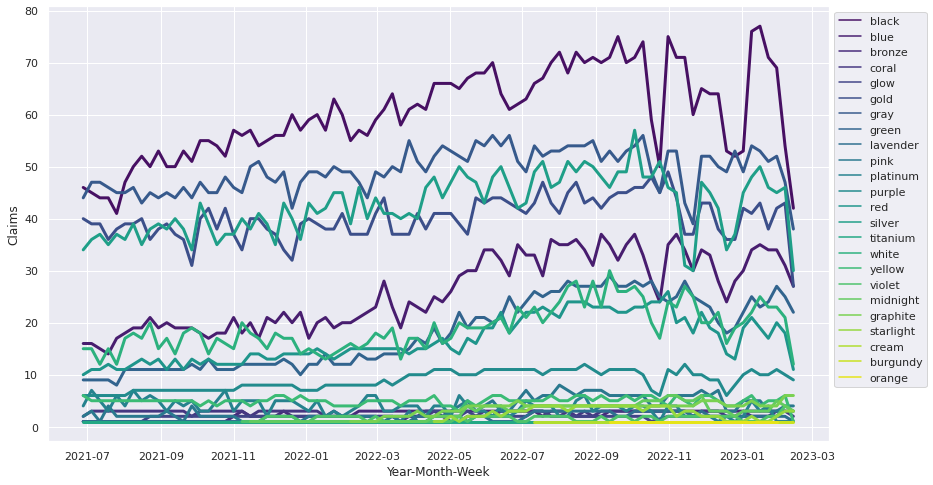

In [96]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_iphone_11_test_128gb_claim_count_color, x ='weeks_monday', y = 'total_claim',
                  hue='phone color', palette='viridis',
                  legend='full', lw=3)

#ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Claims')
plt.xlabel('Year-Month-Week')
plt.show()

In [98]:
import plotly.graph_objects as go

#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis',n_colors=len(list_scode)).as_hex())

fig = go.Figure()
for d,p in zip(list_district, pal):
    fig.add_trace(go.Scatter(x = df_monthly[df_iphone_11_test_128gb_claim_count_color['District']==d]['weeks_monday'],
                             y = df_monthly[df_iphone_11_test_128gb_claim_count_color['District']==d]['total_claim'],
                             name = d,
                             line_color = p, 
                             fill=None))   #tozeroy 

fig.show()

NameError: name 'list_district' is not defined

<AxesSubplot:xlabel='claim', ylabel='phone size'>

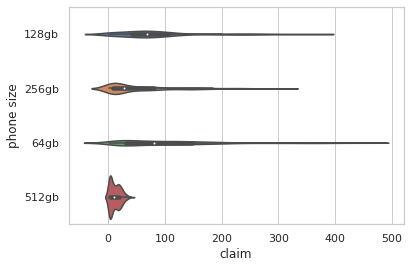

In [24]:
sns.violinplot(data=df, x=df_iphone_11["claim"], y=df_iphone_11["phone size"])

<AxesSubplot:xlabel='claim', ylabel='phone size'>

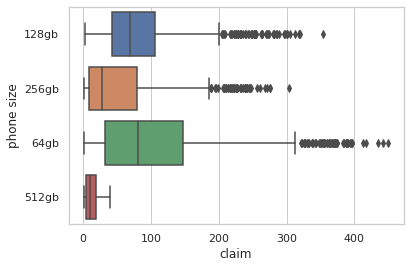

In [25]:
sns.boxplot(data=df, x=df_iphone_11["claim"], y=df_iphone_11["phone size"])

From my point of view, the boxplot does not help. There seems no outliers for 512gb ones while a lot of the 64gb ones. 
However, 512gb are minority, which are more likely to be droped than 64gb ones.

Do the same plots for iphone 12 & 13

In [26]:
df_iphone_12 = df_iphone[df_iphone['phone model'].str.contains('12')]

In [27]:
df_iphone_12

,Unnamed: 0,phone model,phone size,phone color,claim,weeks_monday,Year,Month,brand,model,generation,week_of_month,month,year
3059,3059,apple iphone 12,128gb,black,14,2021-08-02,2021,8,apple,iphone,12,1,8,2021
3060,3060,apple iphone 12,128gb,black,43,2021-08-09,2021,8,apple,iphone,12,2,8,2021
3061,3061,apple iphone 12,128gb,black,57,2021-08-16,2021,8,apple,iphone,12,3,8,2021
3062,3062,apple iphone 12,128gb,black,65,2021-08-23,2021,8,apple,iphone,12,4,8,2021
3063,3063,apple iphone 12,128gb,black,59,2021-08-30,2021,8,apple,iphone,12,5,8,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6273,6273,apple iphone 12,512gb,silver,7,2023-01-09,2023,1,apple,iphone,12,2,1,2023
6274,6274,apple iphone 12,512gb,silver,9,2023-01-16,2023,1,apple,iphone,12,3,1,2023
6275,6275,apple iphone 12,512gb,silver,5,2023-01-23,2023,1,apple,iphone,12,4,1,2023
6276,6276,apple iphone 12,512gb,silver,8,2023-01-30,2023,1,apple,iphone,12,5,1,2023


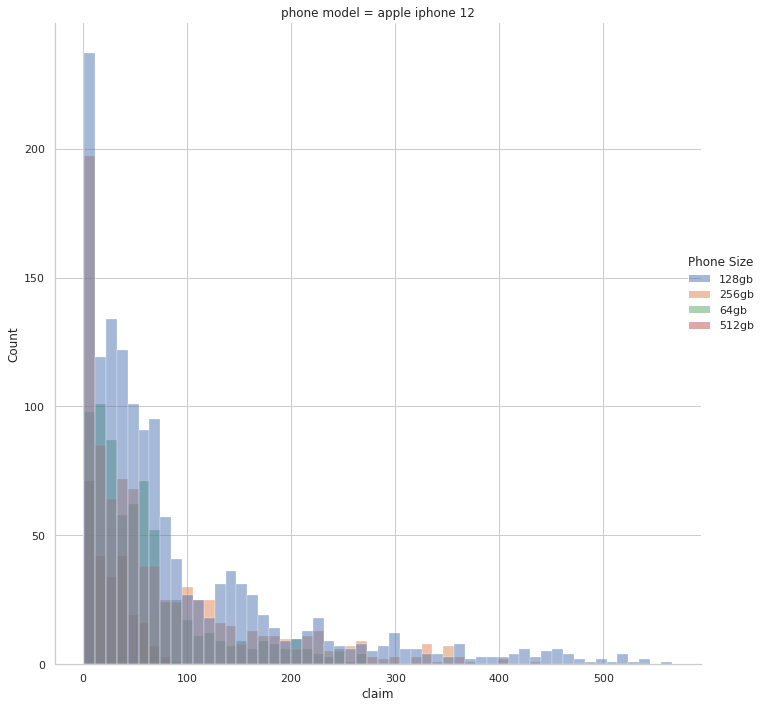

In [28]:
g_iphone_12 = sns.displot(df_iphone_12, x="claim", hue="phone size", col="phone model", col_wrap=1, height=3)
sns.move_legend(g_iphone_12, "upper left", bbox_to_anchor=(.95, .65), title='Phone Size')
g_iphone_12.fig.set_size_inches(10,10)

# Try redrawing the plot and using tight layout
plt.draw()
plt.tight_layout()

plt.show()

In [29]:
df_iphone_13 = df_iphone[df_iphone['phone model'].str.contains('13')]

In [30]:
df_iphone_13

,Unnamed: 0,phone model,phone size,phone color,claim,weeks_monday,Year,Month,brand,model,generation,week_of_month,month,year
6278,6278,apple iphone 13,128gb,blue,2,2021-11-29,2021,11,apple,iphone,13,5,11,2021
6279,6279,apple iphone 13,128gb,blue,2,2021-12-13,2021,12,apple,iphone,13,2,12,2021
6280,6280,apple iphone 13,128gb,blue,1,2021-12-20,2021,12,apple,iphone,13,3,12,2021
6281,6281,apple iphone 13,128gb,blue,9,2021-12-27,2021,12,apple,iphone,13,4,12,2021
6282,6282,apple iphone 13,128gb,blue,3,2022-01-03,2022,1,apple,iphone,13,1,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7934,7934,apple iphone 13,512gb,silver,1,2023-01-16,2023,1,apple,iphone,13,3,1,2023
7935,7935,apple iphone 13,512gb,silver,2,2023-01-23,2023,1,apple,iphone,13,4,1,2023
7936,7936,apple iphone 13,512gb,silver,8,2023-01-30,2023,1,apple,iphone,13,5,1,2023
7937,7937,apple iphone 13,512gb,silver,14,2023-02-06,2023,2,apple,iphone,13,1,2,2023


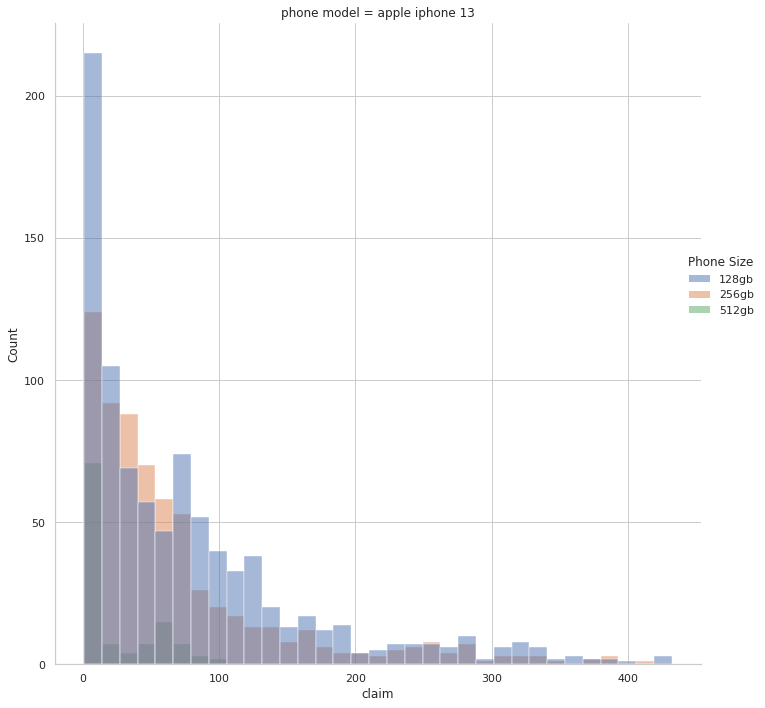

In [31]:
g_iphone_13 = sns.displot(df_iphone_13, x="claim", hue="phone size", col="phone model", col_wrap=1, height=3)
sns.move_legend(g_iphone_13, "upper left", bbox_to_anchor=(.95, .65), title='Phone Size')
g_iphone_13.fig.set_size_inches(10,10)

# Try redrawing the plot and using tight layout
plt.draw()
plt.tight_layout()

plt.show()

# Identifying trends over time (for specific models, colors, storage sizes)

In [32]:
df

,Unnamed: 0,phone model,phone size,phone color,claim,weeks_monday,Year,Month,brand,model,generation,week_of_month,month,year
0,0,alcatel axel,32gb,black,1,2022-01-24,2022,1,alcatel,axel,NaN,4,1,2022
1,1,alcatel axel,32gb,black,3,2022-11-14,2022,11,alcatel,axel,NaN,2,11,2022
2,2,alcatel axel,32gb,black,1,2022-11-21,2022,11,alcatel,axel,NaN,3,11,2022
3,3,alcatel axel,32gb,black,3,2022-11-28,2022,11,alcatel,axel,NaN,4,11,2022
4,4,alcatel axel,32gb,black,1,2022-12-12,2022,12,alcatel,axel,NaN,2,12,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26656,26656,samsung galaxy z fold3,256gb,silver,17,2023-01-30,2023,1,samsung,galaxy,z,5,1,2023
26657,26657,samsung galaxy z fold3,256gb,silver,26,2023-02-06,2023,2,samsung,galaxy,z,1,2,2023
26658,26658,samsung galaxy z fold3,256gb,silver,4,2023-02-13,2023,2,samsung,galaxy,z,2,2,2023
26659,26659,samsung galaxy z fold3,512gb,black,61,2023-02-06,2023,2,samsung,galaxy,z,1,2,2023


In [33]:
df_iphone

,Unnamed: 0,phone model,phone size,phone color,claim,weeks_monday,Year,Month,brand,model,generation,week_of_month,month,year
32,32,apple iphone 11,128gb,black,111,2021-06-28,2021,6,apple,iphone,11,4,6,2021
33,33,apple iphone 11,128gb,black,319,2021-07-05,2021,7,apple,iphone,11,1,7,2021
34,34,apple iphone 11,128gb,black,320,2021-07-12,2021,7,apple,iphone,11,2,7,2021
35,35,apple iphone 11,128gb,black,305,2021-07-19,2021,7,apple,iphone,11,3,7,2021
36,36,apple iphone 11,128gb,black,269,2021-07-26,2021,7,apple,iphone,11,4,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17906,17906,apple iphone xs,64gb,silver,18,2023-01-16,2023,1,apple,iphone,xs,3,1,2023
17907,17907,apple iphone xs,64gb,silver,19,2023-01-23,2023,1,apple,iphone,xs,4,1,2023
17908,17908,apple iphone xs,64gb,silver,14,2023-01-30,2023,1,apple,iphone,xs,5,1,2023
17909,17909,apple iphone xs,64gb,silver,13,2023-02-06,2023,2,apple,iphone,xs,1,2,2023


In [32]:
# fbprophet requires two columns ds and y, so need to first rename the two columns
df_iphone = df_iphone.rename(columns={'weeks_monday': 'ds', 'claim':'y'})

In [ ]:
!conda install -c conda-forge fbprophet -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.

In [ ]:
!pip install --upgrade plotly

In [ ]:
pip install fbprophet

In [33]:
from fbprophet import Prophet
grouped = df_iphone.groupby('phone model','phone size')
for g in grouped.groups:
    group = grouped.get_group(g)
    m = Prophet()
    m.fit(group)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    print(forecast.tail())

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
#(df_iphone[df_iphone['phone model'].str.contains('12')]) 

In [ ]:
#(df_iphone[df_iphone['phone size'].str.contains('128')])

In [34]:

# Filter data by model, color, and storage size
df_filter = df.loc[df_iphone[df_iphone['phone model'].str.contains('12') & df_iphone[df_iphone['phone size'].str.contains('128')]
# df = df.loc[(df_iphone[df_iphone['phone model'].str.contains('12')) & (df_iphone[df_iphone['phone size'].str.contains('128')) ]

# & (df['phone size'] == "512gb")
# & (df['phone color'] == 'blue')


# Convert date column to datetime data type
#df['weeks_monday'] = pd.to_datetime(df['weeks_monday'])

df_filter

SyntaxError: invalid syntax (1749724668.py, line 12)

In [35]:

# Group data by time period and calculate mean sales
grouped = df.groupby(['weeks_monday']).agg({'claim': 'mean'})

# Visualize trends over time using a line chart
sns.lineplot(data=grouped, x='time', y='claim')
plt.show()

ValueError: Could not interpret value `time` for parameter `x`

In [36]:
# Define conditions
model_condition = df['phone model'] == 'apple iphone xr'
color_condition = df['phone color'] == 'yellow'
storage_condition = df['phone size'] == '128gb'

# Filter data by conditions
filtered_data = df[ color_condition & storage_condition]

In [37]:
df_iphone_11_13 = df_iphone[df_iphone['phone model'].str.contains('12|11|13')]
test = df_iphone_11_13.groupby('phone model').size()
test

phone model
apple iphone 11    3027
apple iphone 12    3219
apple iphone 13    1661
dtype: int64

In [38]:
df_iphone_11['weeks_monday'] = pd.to_datetime(df_iphone['weeks_monday'])

# Define a function to plot each group
def plot_group(group, linestyle):
    plt.plot(group['weeks_monday'], group['claim'], linestyle=linestyle)

# Group data by model and plot each group
groups = df_iphone_11.groupby('phone size')





for name, group in groups:
    if name == 'iPhone X':
        plot_group(group, '-')
    else:
        plot_group(group, '--')

# Add legend and labels
plt.legend(groups.groups.keys())
plt.xlabel('Time')
plt.ylabel('Claims')

#Try redrawing the plot and using tight layout
plt.draw()
plt.tight_layout()

# Show the plot
plt.show()

KeyError: 'weeks_monday'

In [39]:
df_iphone_11['weeks_monday'] = pd.to_datetime(df_iphone['weeks_monday'])

# Define a function to plot each group
def plot_group(group, linestyle):
    plt.plot(group['weeks_monday'], group['claim'], linestyle=linestyle)

# Group data by model and plot each group
groups = df_iphone_11.groupby('phone size').size()
groups


for name, group in groups:
    print(name, group)
    if name == 'iPhone X':
        plot_group(group, '-')
    else:
        plot_group(group, '--')

KeyError: 'weeks_monday'